# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [233]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-18-2020.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-19 04:22:00,33.93911,67.709953,38969,1441,32576,4952,Afghanistan,100.104446,3.697811
1,NaN,NaN,NaN,Albania,2020-09-19 04:22:00,41.15330,20.168300,12073,353,6831,4889,Albania,419.521857,2.923880
2,NaN,NaN,NaN,Algeria,2020-09-19 04:22:00,28.03390,1.659600,49413,1659,34818,12936,Algeria,112.683751,3.357416
3,NaN,NaN,NaN,Andorra,2020-09-19 04:22:00,42.50630,1.521800,1564,53,1164,347,Andorra,2024.202420,3.388747
4,NaN,NaN,NaN,Angola,2020-09-19 04:22:00,-11.20270,17.873900,3848,147,1443,2258,Angola,11.708053,3.820166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,NaN,NaN,Unknown,Ukraine,2020-09-19 04:22:00,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
3986,NaN,NaN,NaN,Nauru,2020-09-19 04:22:00,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
3987,NaN,NaN,Niue,New Zealand,2020-09-19 04:22:00,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
3988,NaN,NaN,NaN,Tuvalu,2020-09-19 04:22:00,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [234]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-19 04:22:00,33.93911,67.709953,38969,1441,32576,4952,Afghanistan,100.104446,3.697811
1,NaN,NaN,NaN,Albania,2020-09-19 04:22:00,41.15330,20.168300,12073,353,6831,4889,Albania,419.521857,2.923880
2,NaN,NaN,NaN,Algeria,2020-09-19 04:22:00,28.03390,1.659600,49413,1659,34818,12936,Algeria,112.683751,3.357416
3,NaN,NaN,NaN,Andorra,2020-09-19 04:22:00,42.50630,1.521800,1564,53,1164,347,Andorra,2024.202420,3.388747
4,NaN,NaN,NaN,Angola,2020-09-19 04:22:00,-11.20270,17.873900,3848,147,1443,2258,Angola,11.708053,3.820166


#### Show the information of the dataset

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3261 non-null   float64
 1   Admin2               3266 non-null   object 
 2   Province_State       3814 non-null   object 
 3   Country_Region       3990 non-null   object 
 4   Last_Update          3990 non-null   object 
 5   Lat                  3907 non-null   float64
 6   Long_                3907 non-null   float64
 7   Confirmed            3990 non-null   int64  
 8   Deaths               3990 non-null   int64  
 9   Recovered            3990 non-null   int64  
 10  Active               3990 non-null   int64  
 11  Combined_Key         3990 non-null   object 
 12  Incidence_Rate       3907 non-null   float64
 13  Case-Fatality_Ratio  3934 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 436.5+ KB


#### Show the sum of missing values of features in the dataset

In [236]:
df.isna().sum().reset_index()

,index,0
0,FIPS,729
1,Admin2,724
2,Province_State,176
3,Country_Region,0
4,Last_Update,0
5,Lat,83
6,Long_,83
7,Confirmed,0
8,Deaths,0
9,Recovered,0


### Question 2

#### Show the number of Confirmed cases by Country

In [237]:
df.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,38969
1,Albania,12073
2,Algeria,49413
3,Andorra,1564
4,Angola,3848
...,...,...
192,West Bank and Gaza,34401
193,Winter Olympics 2022,0
194,Yemen,2024
195,Zambia,14022


#### Show the number of Deaths by Country

In [238]:
df.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,1441
1,Albania,353
2,Algeria,1659
3,Andorra,53
4,Angola,147
...,...,...
192,West Bank and Gaza,250
193,Winter Olympics 2022,0
194,Yemen,585
195,Zambia,329


#### Show the number of Recovered cases by Country

In [239]:
df.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,32576
1,Albania,6831
2,Algeria,34818
3,Andorra,1164
4,Angola,1443
...,...,...
192,West Bank and Gaza,23333
193,Winter Olympics 2022,0
194,Yemen,1221
195,Zambia,13207


#### Show the number of Active Cases by Country

In [240]:
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
active_cases = df.groupby('Country_Region')['Active'].sum().reset_index()
active_cases

,Country_Region,Active
0,Afghanistan,4952
1,Albania,4889
2,Algeria,12936
3,Andorra,347
4,Angola,2258
...,...,...
192,West Bank and Gaza,10818
193,Winter Olympics 2022,0
194,Yemen,218
195,Zambia,486


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [241]:
country_summary = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
country_summary

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,38969,1441,32576,4952
1,Albania,12073,353,6831,4889
2,Algeria,49413,1659,34818,12936
3,Andorra,1564,53,1164,347
4,Angola,3848,147,1443,2258
...,...,...,...,...,...
192,West Bank and Gaza,34401,250,23333,10818
193,Winter Olympics 2022,0,0,0,0
194,Yemen,2024,585,1221,218
195,Zambia,14022,329,13207,486


### Question 3

### Show the countries with no recovered cases

In [242]:
no_recovery = country_summary[country_summary['Recovered'] == 0][['Country_Region','Recovered']]
no_recovery

,Country_Region,Recovered
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
107,MS Zaandam,0
124,Nauru,0
135,Palau,0
150,Samoa,0
155,Serbia,0
167,Summer Olympics 2020,0
169,Sweden,0


#### Show the countries with no confirmed cases

In [243]:
no_confirmed = country_summary[country_summary['Confirmed']==0][['Country_Region', 'Confirmed']]
no_confirmed

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
124,Nauru,0
135,Palau,0
150,Samoa,0
167,Summer Olympics 2020,0
178,Tonga,0
182,Tuvalu,0
193,Winter Olympics 2022,0


#### Show the countries with no deaths

In [244]:
no_deaths = country_summary[country_summary['Deaths']==0][['Country_Region','Confirmed', 'Deaths', 'Recovered']]
no_deaths

,Country_Region,Confirmed,Deaths,Recovered
5,Antarctica,0,0,0
20,Bhutan,252,0,182
31,Cambodia,275,0,274
51,Dominica,24,0,18
57,Eritrea,364,0,305
70,Grenada,24,0,24
76,Holy See,12,0,12
92,Kiribati,0,0,0
93,"Korea, North",0,0,0
98,Laos,23,0,22


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [245]:
country_summary.nlargest(10,'Confirmed')

,Country_Region,Confirmed,Deaths,Recovered,Active
183,US,6767199,197465,2556465,4013269
80,India,5308014,85619,4208431,1013964
24,Brazil,4501587,135945,3897539,468103
145,Russia,1086955,19128,898420,169407
38,Colombia,750471,23665,615457,111349
139,Peru,750098,79474,594513,76111
116,Mexico,688954,72803,582109,34042
162,South Africa,657627,15857,586844,54926
164,Spain,640040,30495,150376,459169
7,Argentina,613658,12656,467286,133716


#### Show the Top 10 Countries with Active cases

In [246]:
country_summary.nlargest(10,'Active')

,Country_Region,Confirmed,Deaths,Recovered,Active
183,US,6767199,197465,2556465,4013269
80,India,5308014,85619,4208431,1013964
24,Brazil,4501587,135945,3897539,468103
164,Spain,640040,30495,150376,459169
63,France,469404,31262,92700,345442
187,United Kingdom,388417,58341,2215,327861
145,Russia,1086955,19128,898420,169407
7,Argentina,613658,12656,467286,133716
38,Colombia,750471,23665,615457,111349
185,Ukraine,173703,3535,78273,91895


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [247]:
import matplotlib.pyplot as plt

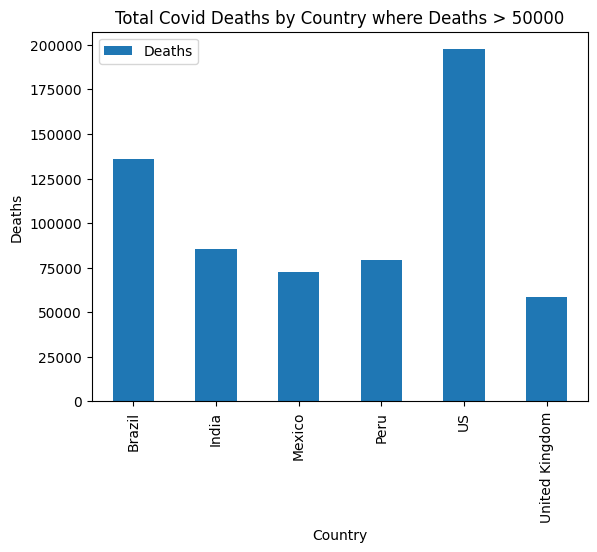

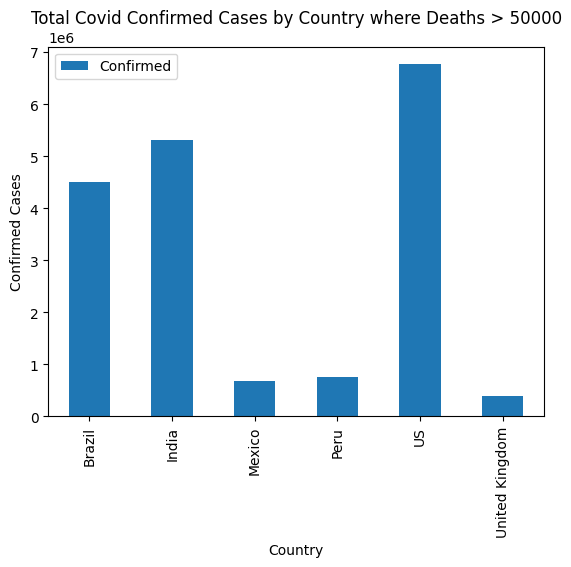

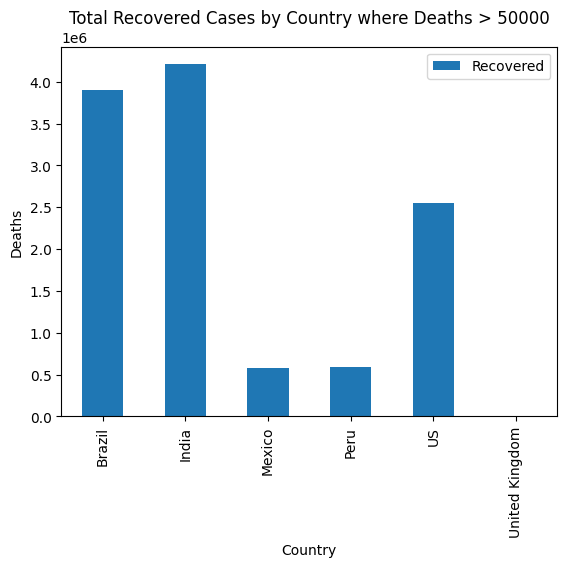

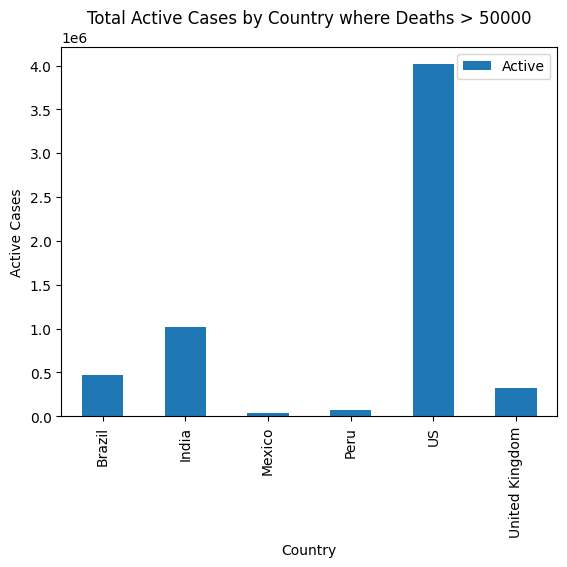

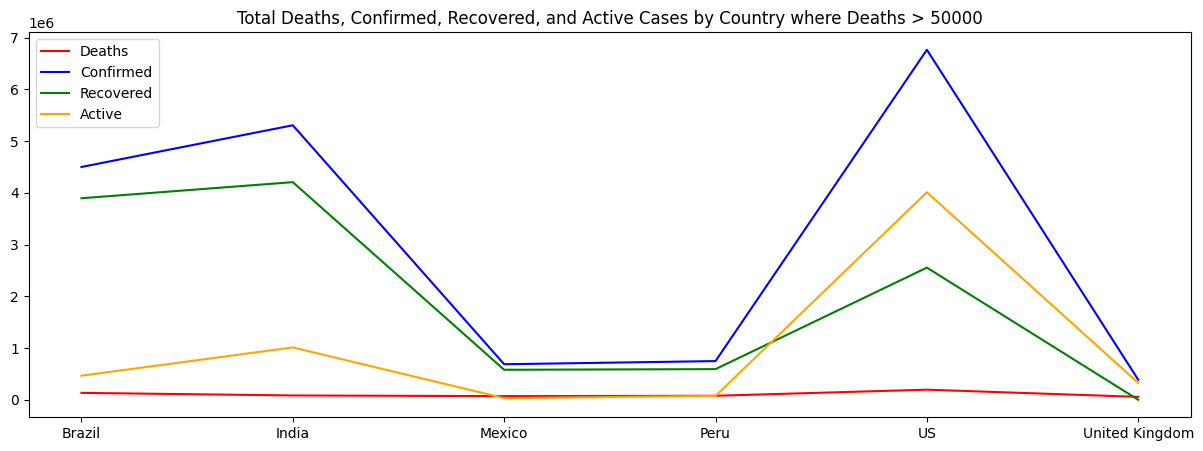

In [248]:
plot_data = country_summary[country_summary['Deaths'] > 50000]
# print(plot_data)
# country_active = plot_data.sort_values('Last_Update').groupby('Country').tail(1)
# plt.figure()
# x = plot_data['Country_Region']
# deaths = plot_data['Deaths']
# confirmed = plot_data['Confirmed']
# recovered = plot_data['Recovered']
# active = plot_data['Active']
# plt.show()

plot_data.plot(x='Country_Region',
        y='Deaths',
        kind='bar',
        stacked=False,
        title='Total Covid Deaths by Country where Deaths > 50000',
        ylabel='Deaths',
        xlabel='Country')

plot_data.plot(x='Country_Region',
        y='Confirmed',
        kind='bar',
        stacked=False,
        title='Total Covid Confirmed Cases by Country where Deaths > 50000',
        ylabel='Confirmed Cases',
        xlabel='Country')

plot_data.plot(x='Country_Region',
        y='Recovered',
        kind='bar',
        stacked=False,
        title='Total Recovered Cases by Country where Deaths > 50000',
        ylabel='Deaths',
        xlabel='Country')

plot_data.plot(x='Country_Region',
        y='Active',
        kind='bar',
        stacked=False,
        title='Total Active Cases by Country where Deaths > 50000',
        ylabel='Active Cases',
        xlabel='Country')

plt.figure(figsize=(15, 5))
plt.plot(plot_data['Country_Region'], plot_data['Deaths'],color='red', label='Deaths')
plt.plot(plot_data['Country_Region'], plot_data['Confirmed'],color='blue', label='Confirmed')
plt.plot(plot_data['Country_Region'], plot_data['Recovered'], color='green', label='Recovered')
plt.plot(plot_data['Country_Region'], plot_data['Active'], color='orange', label='Active')
plt.legend(loc="upper left")
 
plt.title('Total Deaths, Confirmed, Recovered, and Active Cases by Country where Deaths > 50000')
plt.show()

### Note that US did not any Recovered cases in the dataset.

### Question 6

### Plot Province/State wise Deaths in USA

In [249]:
import plotly.express as px

In [250]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [251]:
covid_data.columns
us_summary = covid_data[covid_data['Country_Region'] == 'US']
state_summary= us_summary.groupby('Province_State').sum().reset_index()
covid_data

C:\Users\rjbat\AppData\Local\Temp\ipykernel_10848\3287144862.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-10 05:22:12,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-10 05:22:12,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-10 05:22:12,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-10 05:22:12,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


In [252]:
state_deaths_fig = px.bar(state_summary, x='Province_State', y='Deaths', title='State wise deaths reported of COVID-19 in USA')
state_deaths_fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [253]:
# state_active = us_summary.sort_values('Last_Update').groupby('Province_State').tail(1)
# US has not reported recovered cases, thus skewing the data.

state_active_fig = px.bar(state_summary, x='Province_State', y='Active', title='State wise deaths reported of COVID-19 in USA')
state_active_fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [254]:
state_confirmed_fig = px.bar(state_summary, x='Province_State', y='Confirmed', title='State wise confirmed cases reported of COVID-19 in USA')
state_confirmed_fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [255]:
import plotly.express as px
import plotly.io as pio

In [256]:
confirmed_cases = covid_data.groupby('Last_Update')['Last_Update', 'Confirmed'].sum().reset_index()
fig = px.line(confirmed_cases, x="Last_Update", y="Confirmed",
             title="Worldwide Confirmed Cases Over Time")
fig.show()

C:\Users\rjbat\AppData\Local\Temp\ipykernel_10848\2550618068.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\rjbat\AppData\Local\Temp\ipykernel_10848\2550618068.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

